In [1]:
import pickle 
import yaml
import pandas as pd
from PrepareData import prepare_data


import torch
from torch import nn, optim, Tensor
from torch.nn import functional as F
import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import seaborn as sns
from architecture import CLIP
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.float32


In [2]:
from train_utils import load_model

In [3]:
df = pd.read_csv('../IR_RAW/130k_mols_IDs_Freq.csv')

In [4]:
x = df.iloc[101]['Frequency'].split(";")
x

['165.0865:0.0769',
 '171.7423:0.3740',
 '257.8196:0.2952',
 '336.4515:3.2778',
 '443.4421:8.2212',
 '510.1100:2.1639',
 '764.3241:6.9212',
 '779.6096:13.3166',
 '913.6958:13.0378',
 '971.9898:6.8466',
 '1009.8144:15.9972',
 '1032.8156:2.2128',
 '1132.0519:18.4932',
 '1133.6490:2.7694',
 '1186.8989:6.9812',
 '1187.7770:1.3802',
 '1307.8945:2.5036',
 '1385.1783:6.2613',
 '1417.0342:6.4824',
 '1422.1922:14.9437',
 '1466.7239:4.1165',
 '1477.0813:2.1203',
 '1488.3356:0.0032',
 '1498.5213:10.3535',
 '1522.6451:12.1685',
 '3037.3486:19.9054',
 '3040.2763:16.0926',
 '3068.2498:15.2670',
 '3082.2583:51.3211',
 '3097.8380:5.5063',
 '3098.7297:31.6940',
 '3130.6585:22.7011',
 '3141.1902:32.0195']

In [5]:
broad_ir = pickle.load(open('../IR_RAW/qm9_broad_ir.pkl', 'rb'))

In [6]:
ar = np.array([0.0 for i in range(000,4002)])
for val in x:
    freq = int(float((val.split(":")[0])))
    intens = float(val.split(":")[1])
    ar[freq] = intens
    

In [13]:
far = []
for i in range(400,4002,2):
    far.append(max(ar[i], ar[i+1]))
far = np.array(far)

In [14]:
len(far)

1801

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))



<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

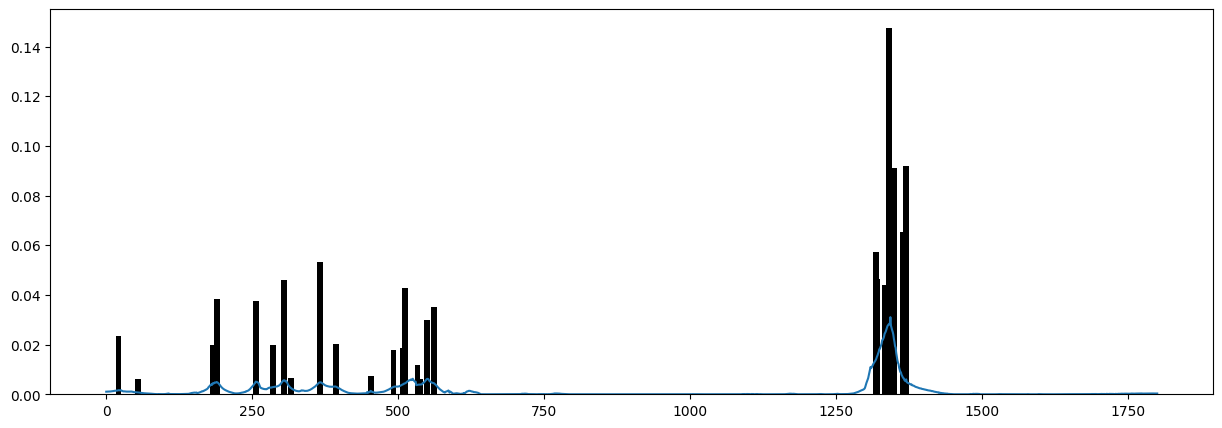

In [28]:
x = np.arange(0, 1801, 1)
plt.figure(figsize=(15,5))
plt.plot(broad_ir.iloc[101]['IR_Data'])
plt.bar(x, (far/far.sum()), width=10,edgecolor='None',color='k')
plt.show()

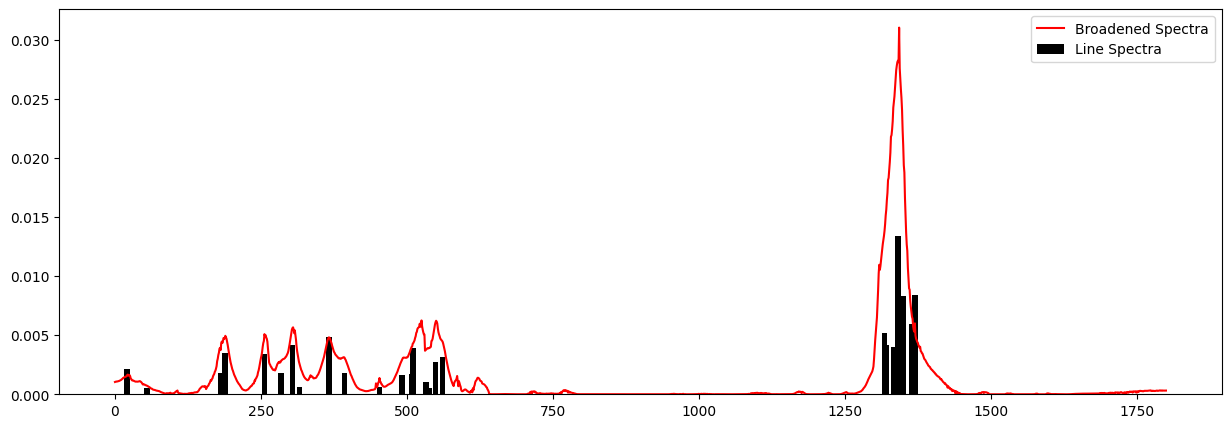

In [31]:
x = np.arange(0, 1801, 1)
plt.figure(figsize=(15,5))
plt.plot(broad_ir.iloc[101]['IR_Data'], color="red", label="Broadened Spectra")
plt.bar(x, (far/far.sum())/11, width=10,edgecolor='None',color='k', label="Line Spectra")
plt.legend()
plt.show()

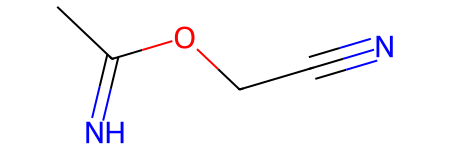

In [52]:
Chem.MolFromSmiles('N=C(C)OC(C#N)')

In [11]:
config = yaml.safe_load(open('./checkpoints/RUN_unit_norm_fixed_decoder/config.yaml', 'r'))
model = load_model(config['train']['checkpoint_dir'], type="best_total")
model.eval()
dataloaders, max_charge, num_species = prepare_data(config)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [12]:
vocab = pickle.load(open('./data/qm9_vocab.pkl', 'rb'))

In [13]:
for i, data in enumerate(dataloaders['train']):
    ir = data['IR']
    data
    break

In [14]:
smi = ""
for tok in vocab.from_seq(data['smiles'][101]):
    if tok != "<sos>" and tok != "<eos>" and tok!= "<pad>":
        smi += tok

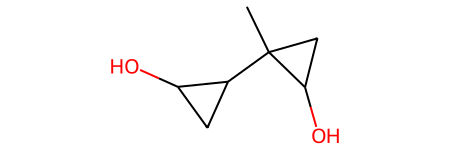

In [15]:
mol = Chem.MolFromSmiles(smi)
mol

In [16]:
# !pip install py3Dmol

In [17]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

def show(smi, style='stick'):
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    mblock = Chem.MolToMolBlock(mol)

    view = py3Dmol.view(width=500, height=500)
    view.addModel(mblock, 'mol')
    view.setStyle({style:{}})
    view.zoomTo()
    view.show()
show(smi)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [18]:
sns.reset_defaults()

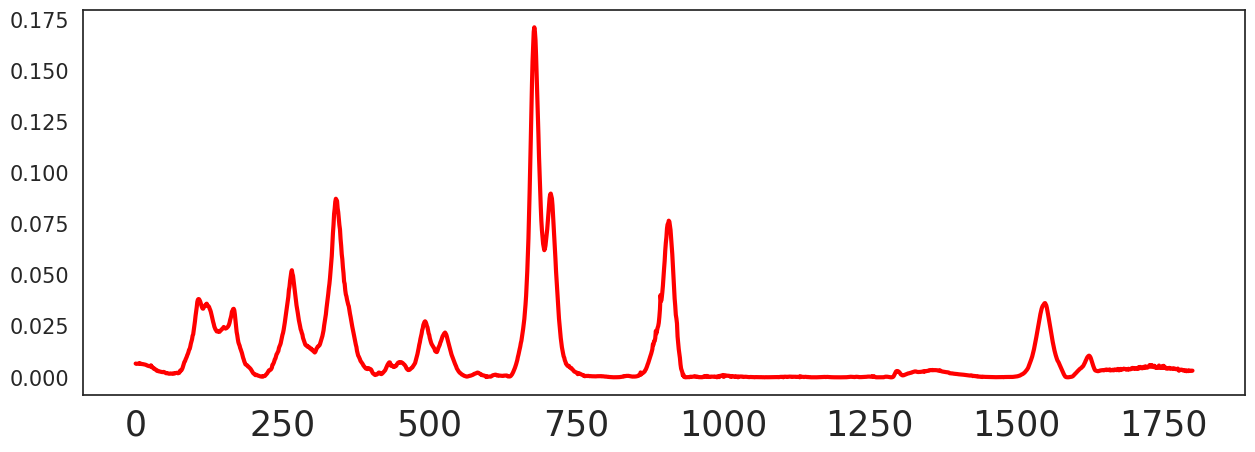

In [79]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# df = pd.DataFrame()
# df['ir']
# sns.set(font_scale=3)
# sns.set(rc = {'figure.figsize':(15,5)})
# sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set(font_scale=3)
# sns.set_theme(style='white')

plt.figure(figsize=(15,5))
plt.plot(ir[299],color="red", linewidth=3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=15)
plt.savefig('ir.png', dpi=300)
# sns.set(font_scale = 1)

# plt.xlabel('xlabel', fontsize=18)
# plt.ylabel('ylabel', fontsize=16)
# fig.get_figure().savefig('ir.png', dpi=300)

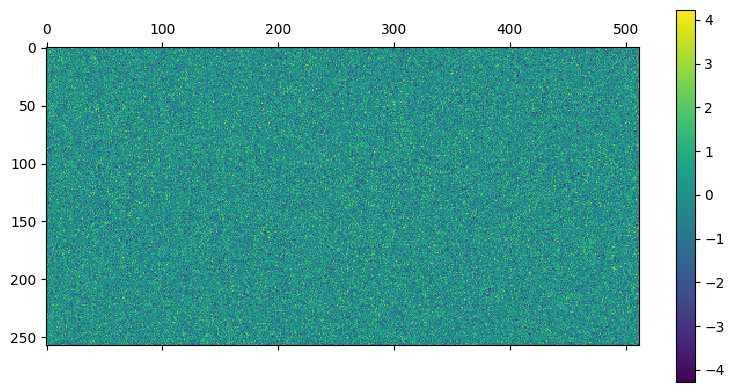

In [28]:
plt.matshow(model.module.Spectra_Encoder.enc.pos_emb.weight.detach().cpu()[:257])
plt.colorbar()

In [128]:
a.shape

torch.Size([1, 100])

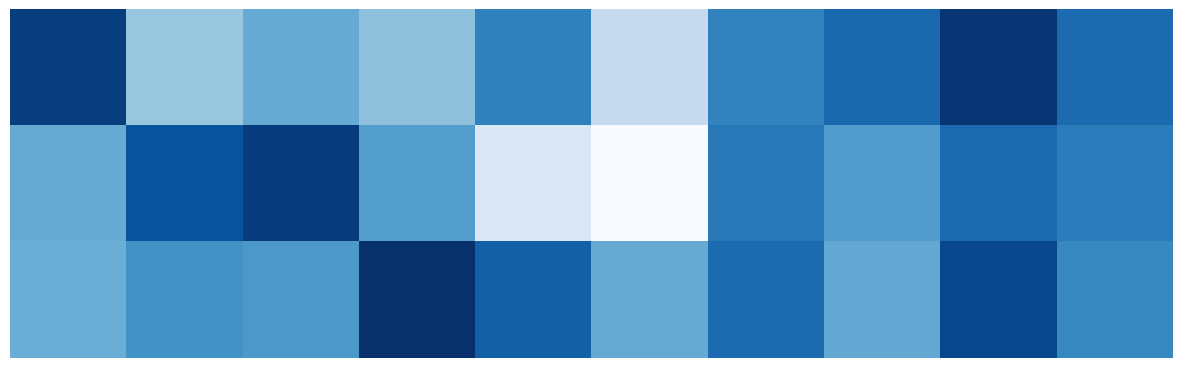

In [140]:
b = torch.rand(3,10,10).mean(axis=1) 
# img = plt.matshow(mat)
plt.axis('off')
plt.imshow( b, cmap='Blues')
plt.savefig('a.png', dpi=300)

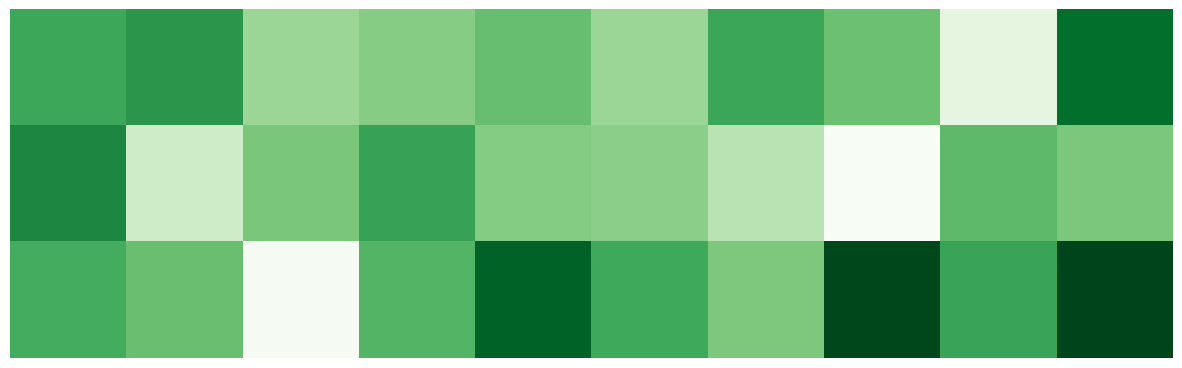

In [142]:
a = torch.rand(3,10,10).mean(axis=1) 
# img = plt.matshow(mat)
plt.axis('off')
plt.imshow( a, cmap='Greens')
plt.savefig('a.png', dpi=300)

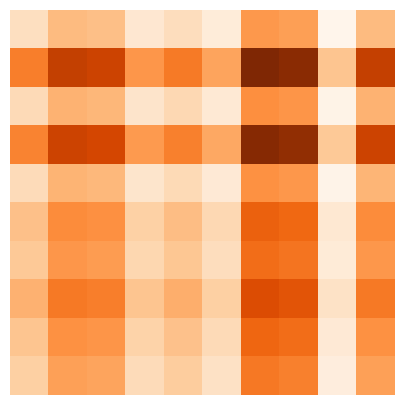

In [139]:

mat =  a.t() @ b
# img = plt.matshow(mat)
plt.axis('off')
plt.imshow( mat, cmap='Oranges')
plt.savefig('temp.png', dpi=300)

In [19]:
def clip_performance(config, model, dataloaders, epoch):
    # model.to(device)
    model.eval()
    max_charge = config['data']['max_charge']
    num_species = config['data']['num_species']

    molembeds = []
    specembeds = []
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloaders['val'])):    
            data = {k: v.to(device) for k, v in data.items()}
            mol_latents, spec_latents, smile_preds, logit_scale, ids = model(data)
            molembeds.append(mol_latents.detach().cpu())
            specembeds.append(spec_latents.detach().cpu())
        del mol_latents, spec_latents, smile_preds, logit_scale, ids

    test_molembeds = torch.cat(molembeds, 0)
    test_specembeds = torch.cat(specembeds, 0)
    
    # molembeds = []
    # specembeds = []
    # with torch.no_grad():
    #     for i, data in tqdm(enumerate(dataloaders['train'])):    
    #         data = {k: v.to(device) for k, v in data.items()}
    #         mol_latents, spec_latents, smile_preds, logit_scale, ids = model(data)
    #         molembeds.append(mol_latents.detach().cpu())
    #             # specembeds.append(spec_latents.detach().cpu())
    #     del mol_latents, spec_latents, smile_preds, logit_scale, ids
    
    # train_molembeds = torch.cat(molembeds, 0)
    # train_specembeds = torch.cat(specembeds, 0)
    
    # all_molembeds = torch.cat(( test_molembeds, train_molembeds), axis = 0)
    # del train_molembeds
    
    # tops, scores = top_scores(test_specembeds, all_molembeds)
    # del all_molembeds
    
    # for k, acc in zip(tops, scores):
    #     # print("Full Top {} Spec".format(k), acc)
    #     print({"Full Top {} Spec".format(k): acc})
        

    # tops, scores = top_scores(test_specembeds, test_molembeds )
    # for k, acc in zip(tops, scores):
    #     # print("Test Top {} Spec".format(k), acc)
    #     print({"Test Top {} Spec".format(k): acc})

    # wandb.log({'Distance Distribution Train': distance_distribution(train_molembeds, train_specembeds)}, step=epoch) 
    # del train_molembeds, train_specembeds
    # decoder_acc, decoder_validity = decoder_performance(config, model, dataloaders, epoch)
    # print("===================================================================================","HERE", decoder_acc, decoder_validity,)
    plt.clf()
    # distance_distribution(test_molembeds, test_specembeds)
    return test_molembeds, test_specembeds

In [20]:
from train_utils import top_scores, decoder_performance, distance_distribution
test_molembeds, test_specembeds = clip_performance(config,model,dataloaders, -1)

0it [00:00, ?it/s]/home2/kanakala.ganesh/miniconda3/envs/sbdd-env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
50it [00:25,  1.98it/s]


In [21]:
test_molembeds.shape

torch.Size([20000, 512])

In [22]:
allembeds = torch.cat([test_molembeds, test_specembeds], dim=0)
allembeds.shape

torch.Size([40000, 512])

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter = 500, verbose=1, metric='cosine')

In [24]:
embeds3d = tsne.fit_transform(allembeds)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.012s...
[t-SNE] Computed neighbors for 40000 samples in 26.188s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sa

In [25]:
embeds3d.shape

(40000, 3)

In [26]:
df = pd.DataFrame(embeds3d, columns=['x','y','z'])
ids =[ (i % test_molembeds.shape[0]) for i in range(embeds3d.shape[0])]
label = ['other' for i in range(embeds3d.shape[0])]
tgt_index = 0
label[tgt_index] = "pair"
label[test_molembeds.shape[0] + tgt_index] = "pair"
df['ids'] = ids
df['label'] = label

In [12]:
count = 100
fdf = pd.concat([df[0:count],df[test_molembeds.shape[0]:test_molembeds.shape[0]+count]])

In [13]:
import plotly.express as px
fig = px.scatter_3d(fdf, x='x', y='y', z='z',
              color='label')
fig.show()

In [14]:
!pip install umap-learn

In [15]:
!pip install kaleido

In [30]:
import numpy as np
import numba
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import umap.umap_ as umap
%matplotlib inline

/home2/kanakala.ganesh/miniconda3/envs/sbdd-env/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home2/kanakala.ganesh/miniconda3/envs/sbdd-env/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home2/kanakala.ganesh/miniconda3/envs/sbdd-

In [31]:
def get_best_ids(embs1, embs2,k=10):
    prod = embs1 @ embs2.t()
    diag = torch.diagonal(prod)
    vals, ids = torch.topk(diag,k)
    return vals, ids

In [32]:
best_vals, best_ids = get_best_ids(test_molembeds, test_specembeds)

In [ ]:
df = pd.DataFrame()

mapper = umap.UMAP(n_components=3, random_state=42, verbose=1).fit(allembeds)

x = mapper.embedding_[:, 0]
y = mapper.embedding_[:, 1]
z = mapper.embedding_[:, 2]

ids =[ (i % test_molembeds.shape[0]) for i in range(embeds3d.shape[0])]
label = ['other' for i in range(embeds3d.shape[0])]
for i, id  in enumerate(best_ids):
    label[id.item()] = "pair" + str(i)
    label[test_molembeds.shape[0] + id.item()] = "pair" + str(i)
    
df['x'] = x
df['y'] = y
df['z'] = z
df['ids'] = ids
df['label'] = label
sizes = [12 for i in range(allembeds.shape[0])]
for i, id  in enumerate(best_ids):
    sizes[id.item() ] = 48
    sizes[test_molembeds.shape[0] + id.item()] = 48

df['marker_size'] = sizes

random_ids = np.random.randint(0, test_molembeds.shape[0], size=490)

best_df = pd.concat([ df.iloc[best_ids],df.iloc[best_ids + test_molembeds.shape[0]]])
random_df = pd.concat([df.iloc[random_ids],df.iloc[random_ids + test_molembeds.shape[0]]])
fdf = pd.concat([random_df, best_df])

import plotly.express as px
import plotly.graph_objs as go
import kaleido
fig = px.scatter_3d(fdf, x='x', y='y', z='z',
              color='label',
              opacity= 1,
              width=1000,
              height=1000,
            #   color_discrete_sequence=["red", "green", "blue", "magenta", "cyan"] + ["grey"],
              size='marker_size'
              )
# fig.update_traces(marker_size = 7)
fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(
    scene=dict(
                xaxis = dict(nticks=10, range=[0, 10], gridcolor="slategrey", backgroundcolor="rgba(0, 0, 0,0.04)", showbackground=True, zerolinecolor="white"),
                yaxis = dict(nticks=10, range=[0, 10], gridcolor="slategrey", backgroundcolor="rgba(0, 0, 0,0.04)", showbackground=True, zerolinecolor="white"),
                zaxis = dict(nticks=10, range=[0, 10], gridcolor="slategrey", backgroundcolor="rgba(0, 0, 0,0.04)", showbackground=True, zerolinecolor="white"),
            ),
    )

fig.show()
fig.write_image('images/3d_umap_visualization_cosine.jpeg', engine='kaleido')



UMAP(n_components=3, random_state=42, verbose=1)
Sat Aug  5 20:12:13 2023 Construct fuzzy simplicial set
Sat Aug  5 20:12:13 2023 Finding Nearest Neighbors
Sat Aug  5 20:12:13 2023 Building RP forest with 13 trees
Sat Aug  5 20:12:13 2023 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	Stopping threshold met -- exiting after 5 iterations
Sat Aug  5 20:12:14 2023 Finished Nearest Neighbor Search
Sat Aug  5 20:12:15 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Sat Aug  5 20:12:36 2023 Finished embedding


In [ ]:
fdf

x         y         z    ids   label  marker_size
9948   3.161683  7.299296  3.715460   9948   other           12
10977  9.333329  5.167778  5.459155  10977   other           12
4316   4.575646  6.825015  6.478067   4316   other           12
4362   2.068114  4.478239  6.317101   4362   other           12
12276  2.478022  6.458115  5.285077  12276   other           12
...         ...       ...       ...    ...     ...          ...
23160  8.182958  6.558936  5.940772  10872  pair15           48
19570  5.015284  7.878707  5.971694   7282  pair16           48
12653  9.087848  6.613181  6.196032    365  pair17           48
15840  2.832074  3.267166  6.003472   3552  pair18           48
18650  9.034091  6.431002  5.100952   6362  pair19           48

[1020 rows x 6 columns]

In [37]:
df = pd.DataFrame()

sphere_mapper = umap.UMAP(output_metric='haversine', random_state=42, verbose=1).fit(allembeds)

x = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
y = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
z = np.cos(sphere_mapper.embedding_[:, 0])

ids =[ (i % test_molembeds.shape[0]) for i in range(embeds3d.shape[0])]
label = ['other' for i in range(embeds3d.shape[0])]
for i, id  in enumerate(best_ids):
    label[id.item()] = "pair" + str(i)
    label[test_molembeds.shape[0] + id.item()] = "pair" + str(i)
    
df['x'] = x
df['y'] = y
df['z'] = z
df['ids'] = ids
df['label'] = label
sizes = [12 for i in range(allembeds.shape[0])]
for i, id  in enumerate(best_ids):
    sizes[id.item() ] = 48
    sizes[test_molembeds.shape[0] + id.item()] = 48

df['marker_size'] = sizes

random_ids = np.random.randint(0, test_molembeds.shape[0], size=490)

best_df = pd.concat([ df.iloc[best_ids],df.iloc[best_ids + test_molembeds.shape[0]]])
random_df = pd.concat([df.iloc[random_ids],df.iloc[random_ids + test_molembeds.shape[0]]])
fdf = pd.concat([random_df, best_df])

import plotly.express as px
import plotly.graph_objs as go
import kaleido
fig = px.scatter_3d(fdf, x='x', y='y', z='z',
              color='label',
              opacity= 1,
              width=1000,
              height=1000,
              color_discrete_sequence= ["grey"] + ["red", "green", "blue", "magenta", "cyan"] ,
              size='marker_size'
              )
# fig.update_traces(marker_size = 7)
fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(
    scene=dict(
                xaxis = dict(nticks=10, range=[-1,1], gridcolor="slategrey", backgroundcolor="rgba(0, 0, 0,0.04)", showbackground=True, zerolinecolor="white"),
                yaxis = dict(nticks=10, range=[-1,1], gridcolor="slategrey", backgroundcolor="rgba(0, 0, 0,0.04)", showbackground=True, zerolinecolor="white"),
                zaxis = dict(nticks=10, range=[-1,1], gridcolor="slategrey", backgroundcolor="rgba(0, 0, 0,0.04)", showbackground=True, zerolinecolor="white"),
            ),
    )

fig.show()
fig.write_image('images/3d_umap_visualization_haversine.jpeg', engine='kaleido', scale=3)



UMAP(output_metric='haversine', random_state=42, verbose=1)
Sat Aug 12 03:35:18 2023 Construct fuzzy simplicial set
Sat Aug 12 03:35:18 2023 Finding Nearest Neighbors
Sat Aug 12 03:35:18 2023 Building RP forest with 13 trees
Sat Aug 12 03:35:18 2023 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	Stopping threshold met -- exiting after 5 iterations
Sat Aug 12 03:35:20 2023 Finished Nearest Neighbor Search
Sat Aug 12 03:35:20 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Sat Aug 12 03:36:43 2023 Finished embedding


In [38]:
fdf

x         y         z    ids  label  marker_size
2461  -0.011904 -0.705237 -0.708872   2461  other           12
7146  -0.652334 -0.609876  0.450013   7146  other           12
11980 -0.354107 -0.307464 -0.883218  11980  other           12
6588   0.376991 -0.148300  0.914268   6588  other           12
10852 -0.918932  0.372496  0.129655  10852  other           12
...         ...       ...       ...    ...    ...          ...
18993  0.660926 -0.658265  0.360365   6705  pair2           48
24360  0.767887 -0.621027 -0.157079  12072  pair3           48
16027  0.798805  0.473829 -0.370672   3739  pair4           48
14550  0.837619 -0.144664 -0.526751   2262  pair5           48
18906  0.636670  0.643068 -0.425575   6618  pair6           48

[994 rows x 6 columns]

In [43]:
df = pd.DataFrame()
best_vals, best_ids = get_best_ids(test_molembeds, test_specembeds, k=6)

mapper = umap.UMAP( n_neighbors=10, random_state=42, verbose=1).fit(allembeds)

x = mapper.embedding_[:, 0]
y = mapper.embedding_[:, 1]

ids =[ (i % test_molembeds.shape[0]) for i in range(embeds3d.shape[0])]
label = ['other' for i in range(embeds3d.shape[0])]
for i, id  in enumerate(best_ids):
    label[id.item()] = "pair" + str(i)
    label[test_molembeds.shape[0] + id.item()] = "pair" + str(i)
    
df['x'] = x
df['y'] = y
df['ids'] = ids
df['label'] = label
sizes = [40 for i in range(allembeds.shape[0])]
for i, id  in enumerate(best_ids):
    sizes[id.item() ] = 70
    sizes[test_molembeds.shape[0] + id.item()] = 70

df['marker_size'] = sizes

random_ids = np.random.randint(0, test_molembeds.shape[0], size=2980)

best_df = pd.concat([ df.iloc[best_ids],df.iloc[best_ids + test_molembeds.shape[0]]])
random_df = pd.concat([df.iloc[random_ids],df.iloc[random_ids + test_molembeds.shape[0]]])
fdf = pd.concat([random_df, best_df])


# fig.get_figure().savefig('images/2d_umap_visualization_default.png',dpi=600)


UMAP(n_neighbors=10, random_state=42, verbose=1)
Mon Aug 14 20:35:43 2023 Construct fuzzy simplicial set
Mon Aug 14 20:35:43 2023 Finding Nearest Neighbors
Mon Aug 14 20:35:43 2023 Building RP forest with 15 trees
Mon Aug 14 20:35:43 2023 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	 6  /  15
	Stopping threshold met -- exiting after 6 iterations
Mon Aug 14 20:35:44 2023 Finished Nearest Neighbor Search
Mon Aug 14 20:35:44 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Mon Aug 14 20:36:12 2023 Finished embedding


In [34]:
best_df

x         y    ids  label  marker_size
13314   9.503779  0.914102  13314  pair0           70
7461    6.702228  1.303321   7461  pair1           70
13529  11.562342  7.218115  13529  pair2           70
15620   7.630253  2.037736  15620  pair3           70
422     8.383480  0.845735    422  pair4           70
15056   7.807550  1.276719  15056  pair5           70
4485   11.567036  1.607262   4485  pair6           70
33314   9.538230  0.841629  13314  pair0           70
27461   6.712096  1.392262   7461  pair1           70
33529  11.435531  7.282738  13529  pair2           70
35620   7.663820  2.042358  15620  pair3           70
20422   8.419606  0.844305    422  pair4           70
35056   7.835278  1.247243  15056  pair5           70
24485  11.591190  1.589852   4485  pair6           70

In [35]:
qm9_broad_ir = pickle.load(open('../ir_data/qm9_broad_ir.pkl', 'rb'))
smiles_id_map = {}
for id, row in tqdm(qm9_broad_ir.iterrows()):
    smiles_id_map[int(row['ID'].split('_')[1])] = row['SMILES']

121944it [00:06, 19807.20it/s]


In [36]:
id_ir_map = {}
for id, row in tqdm(qm9_broad_ir.iterrows()):
    id_ir_map[int(row['ID'].split('_')[1])] = row['IR_Data']

121944it [00:06, 19592.89it/s]


In [37]:
import rdkit
from rdkit import Chem


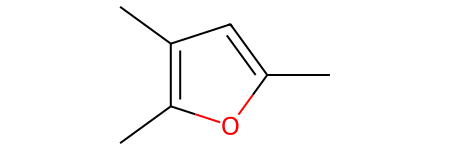

In [70]:
Chem.MolFromSmiles(smiles_id_map[4485])

(array([-0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ]),
 [Text(0, -0.005, '−0.005'),
  Text(0, 0.0, '0.000'),
  Text(0, 0.005, '0.005'),
  Text(0, 0.009999999999999998, '0.010'),
  Text(0, 0.015, '0.015'),
  Text(0, 0.02, '0.020'),
  Text(0, 0.024999999999999998, '0.025'),
  Text(0, 0.030000000000000002, '0.030')])

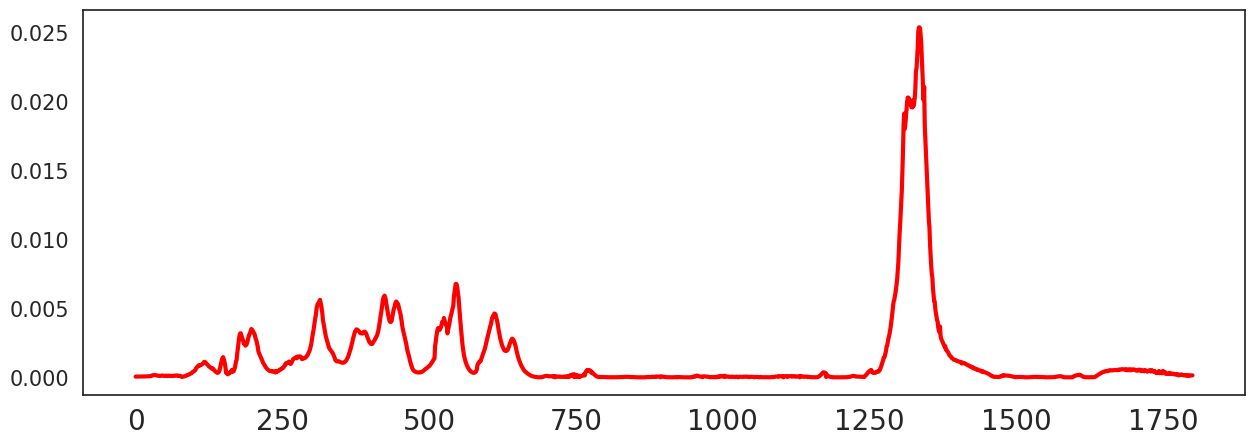

In [71]:
plt.figure(figsize=(15,5))
plt.plot(id_ir_map[4485],color="red", linewidth=3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

